## Introducing the `ModelData` class

This notebook introduces basic features of the [ModelData](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.modeldata.ModelData) class of pyaerocom. The `ModelData` class is the fundamental base class for the analysis of model data. The underlying data type is [iris.cube.Cube](http://scitools.org.uk/iris/docs/latest/iris/iris/cube.html#iris.cube.Cube) which was extended, for instance by allowing direct imports of netCDF files when creating an instance of `ModelData`. This notebook introduces some of the many features of the `ModelData` class. Starting with some imports...

In [1]:
import warnings
warnings.filterwarnings('ignore')
from pyaerocom import ModelData

Let's get a test file to load

In [2]:
from pyaerocom.test_files import get

test_files = get()
print(test_files["models"])

OrderedDict([('aatsr_su_v4.3', '/lustre/storeA/project/aerocom/aerocom-users-database/CCI-Aerosol/CCI_AEROSOL_Phase2/AATSR_SU_v4.3/renamed/aerocom.AATSR_SU_v4.3.daily.od550aer.2008.nc'), ('ecmwf_osuite', '/lustre/storeA/project/aerocom/aerocom1/ECMWF_OSUITE_NRT_test/renamed/aerocom.ECMWF_OSUITE_NRT_test.daily.od550aer.2018.nc')])


The dictionary, returned by the `get()` function is categorised into two subirectories for model based test files (`key="models"`) and for observation based test files (`key=observations`). So far, there is not much in there (i.e. only two files). 

Let's pick out the ECMWF OSUITE test file and load the data directly into an instance of the `ModelData` class. The `ModelData` class takes either preloaded instances of the `iris.cube.Cube` class as input, or a valid netCDF file path. The latter requires specification of the variable name which is then filtered from the data stored in the netCDF file (which may contain multiple variables. The following example imports the data for the aerosol optical density at 550 nm. The string representation of the `ModelData` class (see print at end of following code cell) was slitghtly adapted from the underlying `Cube` object.

In [3]:
fpath = test_files["models"]["ecmwf_osuite"]
data = ModelData(input=fpath, var_name="od550aer", model_id="ECMWF_OSUITE")
print(data)

Rolling longitudes to -180 -> 180 definition
pyaerocom.ModelData: ECMWF_OSUITE
Grid data: Dust Aerosol Optical Depth at 550nm / (unknown) (time: 365; latitude: 451; longitude: 900)
     Dimension coordinates:
          time                                       x              -               -
          latitude                                   -              x               -
          longitude                                  -              -               x
     Attributes:
          Conventions: CF-1.0
          NCO: 4.7.2
          history: Tue Mar 20 13:08:49 2018: ncks -7 -O -o test.nc -x -v time_bnds od550aer.test.orig.nc
Tue...
          history_of_appended_files: Tue Mar 20 02:09:15 2018: Appended file /lustre/storeA/project/aerocom/aerocom1/ECMWF_OSUITE_NRT/renamed//aerocom.ECMWF_OSUITE_NRT.daily.od550bc.2018.nc...
          invalid_units: ~
          nco_openmp_thread_number: 1
     Cell methods:
          mean: time


### Note
<div class="alert alert-block alert-info"> 
The longitudes in the ECMWF OSUITE data files are defined 

$$0 \leq\,\text{lon}\,\leq360$$

and are converted automatically to 

$$-180\leq\,\text{lon}\,\leq180$$

when an instance of the `ModelData` class is created (see print statment above *Rolling longitudes to -180 -> 180 definition*)
</div>

In the following cell, some of the most important attributes are introduced. These are mostly reimplementations of the underlying `Cube` data which is stored in the `ModelData.grid` attribute. For instance the attribute `ModelData.longitude` get's you `ModelData.grid.coord("longitude")`, `ModelData.latitude` get's you `ModelData.grid.coord("latitude")` and `ModelData.time` get's you `ModelData.grid.coord("time")`. 

In [4]:
print(data.var_name)
print(type(data.longitude))
print("Longitude attr is pointer to DimCoord instance of underlying Cube: %s" %(data.longitude is data.grid.coord("longitude")))
print(data.longitude.points.min(), data.longitude.points.max())
print(data.latitude.points.min(), data.latitude.points.max())
print(data.time.points.min(), data.time.points.max())
tstamps = data.time_stamps()
print(tstamps[0], tstamps[-1])

od550aer
<class 'iris.coords.DimCoord'>
Longitude attr is pointer to DimCoord instance of underlying Cube: True
-180.0 179.60000610351562
-90.0 90.0
0.0 364.0
2018-01-01T00:00:00.000000 2018-12-31T00:00:00.000000


If you do not specify the variable type, an Exception is raised, that will get you some information about what variables are available in the file (if the file is readable using the `iris.load` method).

In [5]:
try:
    data = ModelData(input=fpath)
except ValueError as e:
    print("This did not work...error message: %s" %repr(e))

This did not work...error message: ValueError("Loading data from input file /lustre/storeA/project/aerocom/aerocom1/ECMWF_OSUITE_NRT_test/renamed/aerocom.ECMWF_OSUITE_NRT_test.daily.od550aer.2018.nc requires specification of a variable name using input parameter var_name. The following variable names exist in input file: ['od550bc', 'od550so4', 'od550oa', 'od550aer', 'od550dust']",)


You can have a quick look at the data using the class-own quickplot method

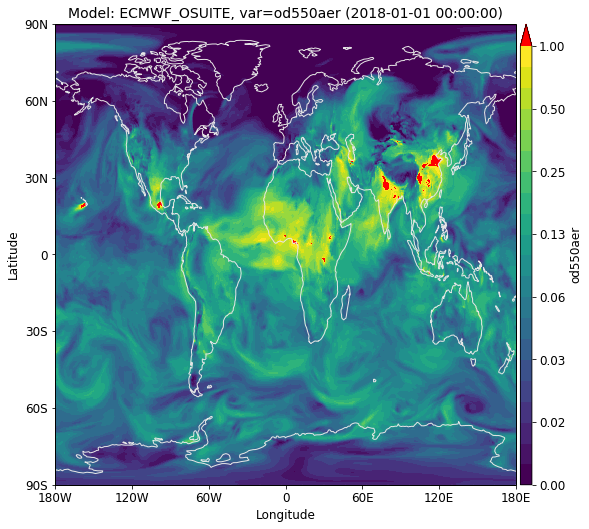

In [6]:
fig = data.quickplot_map(time_idx=0, 
                         fix_aspect=2, 
                         vmin=0, 
                         vmax=5.8, 
                         c_over="r")

The input parameter time_idxWhy not load some of the other variables...

In [7]:
data_bc = ModelData(fpath, var_name="od550bc", model_id="ECMWF_OSUITE")
data_so4 = ModelData(fpath, var_name="od550so4", model_id="ECMWF_OSUITE")

Rolling longitudes to -180 -> 180 definition
Rolling longitudes to -180 -> 180 definition


... and plot them as well

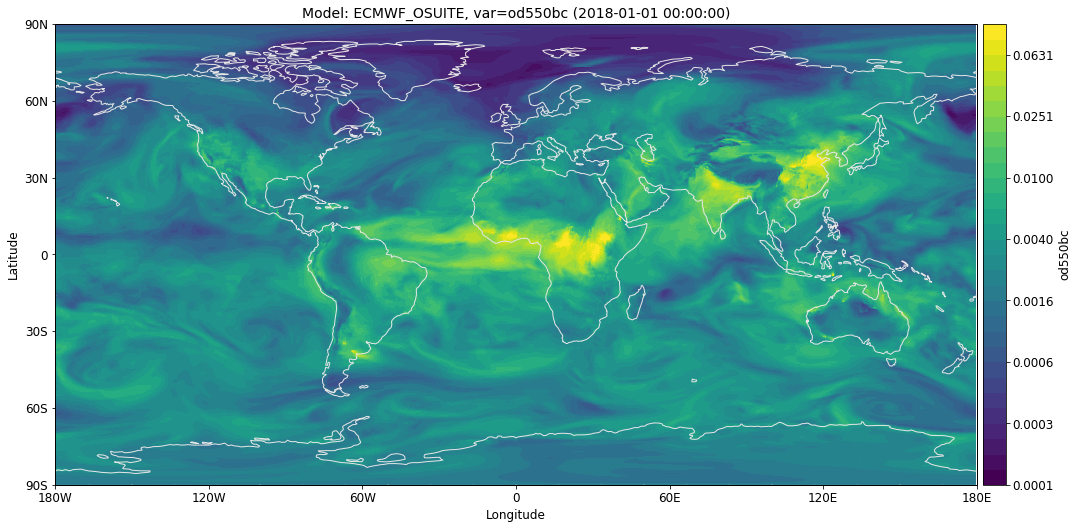

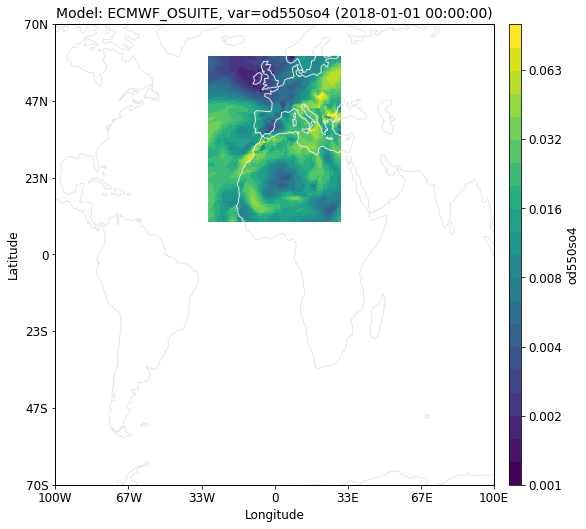

In [8]:
fig1 = data_bc.quickplot_map()
fig2 = data_so4.crop(lon_range=(-30, 30), 
                     lat_range=(10, 60)).quickplot_map(fix_aspect=1.5, 
                                                       xlim=(-100, 100), 
                                                       ylim=(-70, 70))

#### To be continued ..